## Questão 2

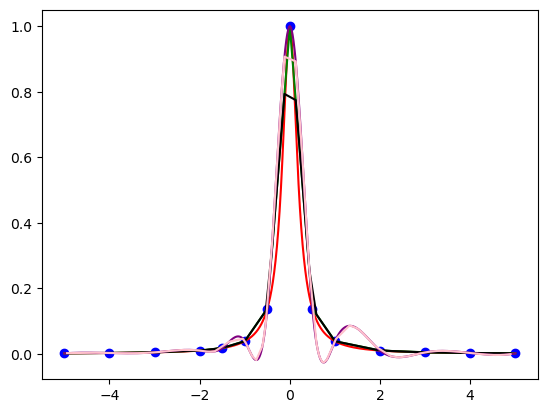

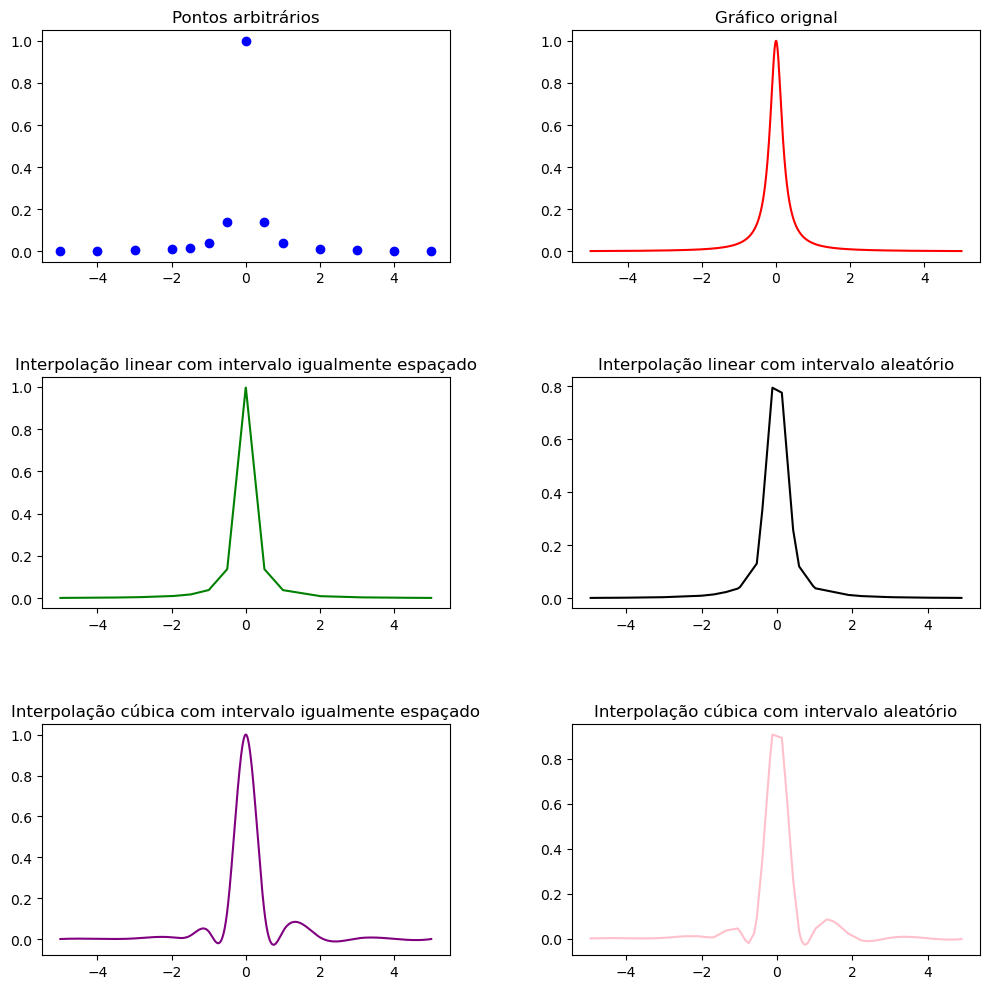

In [45]:
from scipy.interpolate import interp1d
import numpy as np
import matplotlib.pyplot as plt
import random

# a função "desconhecida" a ser interpolada 
def R(x):
    return 1.0/(1.0 + 25.0*x**2)

# Interpolating points
# quanto mais pontos colocarmos entre -0.5 e +0.5, melhor fica a aproximação da curva nesse intervalo (verde)
xi = np.array([-5, -4, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 2, 3, 4, 5])
yi = R(xi)

# Define a set of points to evaluate the functions
# igualmenente espaçados 
xeval = np.linspace(-5, 5, 2000)
yeval = R(xeval)

q = 120
xaleat = np.zeros(shape=(q))
for i in range(q):
    xaleat[i] = random.uniform(-5,5)
xaleat = sorted(xaleat)

# Compute the piecewise 'liner' and 'cubic' polynomial
ylin = interp1d(xi, yi, kind= 'linear')
ycub= interp1d(xi, yi, kind= 'cubic')

# Plot everything
plt.plot(xi, yi, 'ob',
xeval, yeval, '-r',
xeval, ylin(xeval), '-g',
xaleat, ylin(xaleat), 'black',
xeval, ycub(xeval), 'purple',
xaleat, ycub(xaleat), 'pink')

fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].plot(xi, yi, 'ob')
ax[0,0].set_title('Pontos arbitrários')

ax[0,1].plot(xeval, yeval, '-r',)
ax[0,1].set_title('Gráfico orignal')

ax[1,0].plot(xeval, ylin(xeval), '-g')
ax[1,0].set_title('Interpolação linear com intervalo igualmente espaçado')

ax[1,1].plot(xaleat, ylin(xaleat), 'black')
ax[1,1].set_title('Interpolação linear com intervalo aleatório')

ax[2,0].plot(xeval, ycub(xeval), 'purple')
ax[2,0].set_title('Interpolação cúbica com intervalo igualmente espaçado')

ax[2,1].plot(xaleat, ycub(xaleat), 'pink')
ax[2,1].set_title('Interpolação cúbica com intervalo aleatório')

fig.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

## Exercício 4

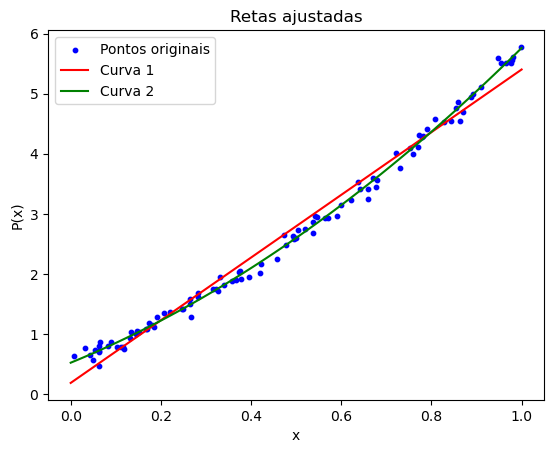

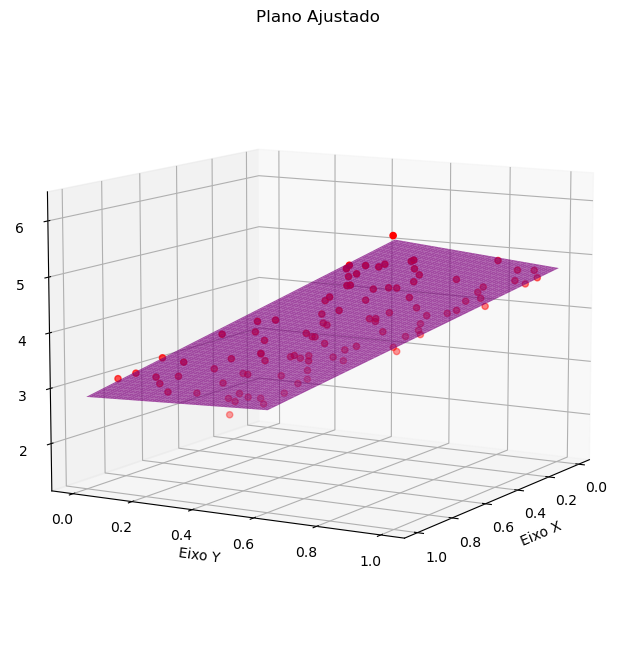

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def inverte(inicio, fim, vetor):
    while inicio < fim:
        aux = vetor[inicio]
        vetor[inicio] = vetor[fim]
        vetor[fim] = aux
        inicio += 1
        fim -= 1
    return vetor

arq = open('data.txt')
linhas = arq.readlines() 
arq.close()
n = len(linhas)
col = np.zeros(shape=(n, 4))

for i in range(0,n):
    l = linhas[i].strip()
    col[i, :] = l.split(' ')

# Uso das equações normais
# c2 = k1 + k2 c1
A1 = np.ones(shape=(n, 2))
A1[:, 1] = col[:, 0]
B1 = A1.T @ A1
k1 = np.linalg.solve(B1, A1.T @ col[:, 2])  # B1 @ k1 = A1^T @ col[:,2]

# c3 = k1 + k2 c1 + k3 c1^2
A2 = np.ones(shape=(n, 3))
A2[:, 1] = col[:, 0]
A2[:, 2] = col[:, 0] ** 2
B2 = A2.T @ A2
k2 = np.linalg.solve(B2, A2.T @ col[:, 2])  # B2 @ k1 = A2^T @ col[:,2]

# c4 = k1 + k2 c1 + k3 c2
A3 = np.ones(shape=(n, 3))
A3[:, 1] = col[:, 0]
A3[:, 2] = col[:, 1]
B3 = A3.T @ A3
k3 = np.linalg.solve(B3, A3.T @ col[:, 3])

# Inverte a ordem dos coeficientes,
# pois polyval usa a sequência decrescente desse vetor
k1 = inverte(0, len(k1)-1, k1)
k2 = inverte(0, len(k2)-1, k2)

# Ajuste das curvas
x = np.linspace(0, 1, 100)
y1 = np.polyval(k1, x)
y2 = np.polyval(k2, x)
y3 = np.polyval(k3, x)

# Plotagem dos dois primeiros gráficos (2D)
plt.scatter(col[:, 0], col[:, 2], color='blue', label='Pontos originais', s=10)
plt.plot(x, y1, '-r', label='Curva 1')
plt.plot(x, y2, '-g', label='Curva 2')
plt.legend()                           # Aplica das legendas de cada um dos gráficos
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Retas ajustadas')
plt.show()

# Plotagem do terceiro gráfico (3D)
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# A função meshgrid "junta" as coordenadas de x e y 
# (cada ponto de X se relaciona com todos os de Y -> plano)
dim_x, dim_y = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100)) 
dim_z = k3[0] + k3[1] * dim_x + k3[2] * dim_y            # Usa-se o vetor na ordem crescente aqui
ax.plot_surface(dim_x, dim_y, dim_z, color='purple', alpha=0.7)

# Pontos adquiridos
ax.scatter(col[:, 0], col[:, 1], col[:, 3], color='red', s=20)

ax.set_title('Plano Ajustado')
ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')

ax.view_init(10, 30)       # Ajusta o ângulo de visão do gráfico (theta, 90 - phi)
plt.show()


## Exercício 5

[0.04000833333333276, 0.008000333333335607, 0.004000083333329574, 0.0008000033333295242, 0.0005333348148255368, 0.00040000083334090775, 0.00026666703703215333] 
 [0.01990033332300989, 0.003996002666664111, 0.0019990003333365536, 0.00039996000271980137, 0.0002666488897311581, 0.00019999000042680848, 0.000133328889060369] 
 [0.01988383330858312, 0.00399533733332591, 0.001998833833331659, 0.00039995333739595296, 0.00026664592716274527, 0.00019998833393009008, 0.0001333281483759663]


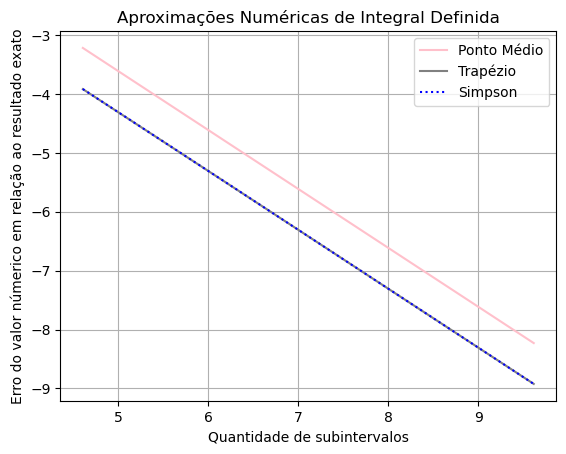

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def funcao_intg(x):
    return 4/(1 + x**2)
def intg_ptomed(inicio, fim, particao, resultado):
    # x_k = a + kh, k= 0,1,2,3,4,...
    # a é o ponto inicial da integração
    # x_N = a + Nh, que é o ponto final da integração
    # h N = b - a
    # h é o tamanho da partição
    # resultado final é h * (f(/x_1) + ... + f(/x_N))
    h = (fim - inicio)/particao
    x_ant = inicio
    soma = 0
    for k in range (particao+1):
        x_atual = inicio + k*h
        x = (x_ant + x_atual)/2
        f = funcao_intg(x)
        soma += f
        x_ant = x_atual
    erro = abs(h * soma - resultado)
    return erro

def intg_trap(inicio, fim, particao, resultado):
    h = (fim - inicio)/particao
    x_ant = inicio
    soma = 0
    for k in range (particao+1):
        x = x_ant + h
        f_ant = funcao_intg(x_ant)
        f = funcao_intg(x)
        soma += (f_ant + f)
        x_ant = x
    erro = abs((h/2)*soma - resultado)
    return erro
def intg_Simpson(inicio, fim, particao, resultado):
    h = (fim - inicio)/particao
    x_ant = inicio
    soma = 0
    for k in range (particao+1):
        x = x_ant + h
        x_med = (x + x_ant)/2
        f_ant = funcao_intg(x_ant)
        f_med = funcao_intg(x_med)
        f = funcao_intg(x)
        soma += (f_ant + 4 * f_med + f)
        x_ant = x
    erro = abs((h/6)*soma - resultado)
    return erro

r = np.pi            # Resultado exato da integral da funcao
part = [100, 500, 1000, 5000, 7500, 10000, 15000]
erros_ptomed = []
erros_trap = []
erros_Simp = []

for p in part:
    e1 = intg_ptomed(0, 1, p, r)
    erros_ptomed.append(e1)
    e2 = intg_trap(0, 1, p, r)
    erros_trap.append(e2)
    e3 = intg_Simpson(0, 1, p, r)
    erros_Simp.append(e3)
print(erros_ptomed, "\n", erros_Simp, "\n", erros_trap)

# Plotar erro (e = abs(valor exato - valor numerico)) por particao (qtd de intervalos)
plt.plot(np.log(part), np.log(erros_ptomed), 'pink', label="Ponto Médio")
plt.plot(np.log(part), np.log(erros_trap), 'gray', label="Trapézio")
plt.plot(np.log(part), np.log(erros_Simp), 'blue', label="Simpson", linestyle=":")
plt.xlabel("Quantidade de subintervalos")
plt.ylabel("Erro do valor númerico em relação ao resultado exato")
plt.title("Aproximações Numéricas de Integral Definida")
plt.legend()
plt.grid()
plt.show()

A manipulação para log-log é uma maneira de visualização de dados que estão relacionados exponencialmente, sendo que tanto o eixo das abcissas quanto o eixo das ordenadas são expostos por uma escala logarítmica. Outro ponto importante é que, à medida que a partição aumenta e o intervalo entre os pontos mapeados diminui, o erro decresce, o que era esperado. Logo, há uma melhor aproximação de acordo com o aumento do número de subintervalos.
Também, vê-se uma equivalência entre os métodos do Trapézio e do Simpson, pois possuem erros muito semelhantes, enquanto a Regra do Ponto Médio tem uma diferença significativa entre eles.

## Exercício 6

In [53]:
import numpy as np
import pandas as pd
from tabulate import tabulate

def GeraRede(nx,ny,CH,CV):
    nv = nx*ny
    nc = (nx-1)*ny + (ny-1)*nx
    
    coord = np.zeros(shape=(nv,2))

    for i in range(nx):
      for j in range(ny):
        ig = i + j*nx
        coord[ig,0] = i
        coord[ig,1] = j

    conec = np.zeros(shape=(nc,2), dtype=int)
    C = np.zeros(nc)
    
    # Loop sobre canos horizontais
    for j in range(ny):
        for i in range(nx-1):
          k = j*(nx-1) + i
          conec[k,0] = j*nx + i
          conec[k,1] = j*nx + i+1
          C[k] = CH

    # Loop sobre canos verticais
    for i in range(nx):
      for j in range(ny-1):
          k = (nx-1)*ny + j*nx + i
          conec[k,0] = i + j*nx
          conec[k,1] = i + (j+1)*nx
          C[k] = CV

    return nv, nc, conec, C, coord

def Assembly(conec, C):
    nv = np.max(conec) + 1 
    nc = len(conec[:,0])  
    A = np.zeros(shape=(nv, nv))
    for k in range(nc):
        n1 = conec[k,0]
        n2 = conec[k,1]
        A[n1,n1] = A[n1,n1] + C[k]
        A[n2,n2] = A[n2,n2] + C[k]
        A[n1,n2] = - C[k]
        A[n2,n1] = - C[k]
    return A

def SolveNetwork(conec, natm, nB, QB, C):
    Atilde = Assembly(conec, C)
    Atilde[natm, :] = 0
    Atilde[natm, natm] = 1
    nv = len(Atilde[0,:])
    b = np.zeros(shape=(nv,1))
    b[nB,0] = QB
    pressure = np.linalg.solve(Atilde, b)
    return pressure

def matrizK(C):
    nc = len(C)
    k = np.zeros(shape=(nc,nc))
    for i in range(nc):
        k[i,i] = C[i]
    return k

def matrizD(conec):
    nv = np.max(conec)+1
    nc = len(conec[:,0]) 
    D = np.zeros(shape=(nc,nv))
    for k in range(nc):
        D[k,conec[k,0]] = 1
        D[k,conec[k,1]] = -1
    return D

def funcao_intg(x):
    nx = 8
    ny = 9
    QB = 3
    natm = nx*ny -1
    nB = 0

    CH = 2.3 + 10 * np.exp(-(x-5)**2)
    CV = 1.8 + 10 * np.exp(-(x-5)**2)
    nv, nc, conec, C, coord = GeraRede(nx, ny , CH, CV)
    pressao = SolveNetwork(conec, natm, nB, QB, C)
    k = matrizK(C)
    d = matrizD(conec)
    pressao_transp = np.transpose(pressao)
    d_transp = np.transpose(d)
    
    P = float(pressao_transp @ d_transp @ k @ d @ pressao) 
    return P

def intg_ptomed(inicio, fim, particao):
    h = (fim - inicio)/particao
    x_ant = inicio
    soma = 0
    for k in range (particao+1):
        x_atual = inicio + k*h
        x = (x_ant + x_atual)/2
        f = funcao_intg(x)
        soma += f
        x_ant = x_atual
    resultado = h * soma
    return resultado

def intg_trap(inicio, fim, particao):
    h = (fim - inicio)/particao
    x_ant = inicio
    soma = 0
    for k in range (particao+1):
        x = x_ant + h
        f_ant = funcao_intg(x_ant)
        f = funcao_intg(x)
        soma += (f_ant + f)
        x_ant = x
    resultado = (h/2)*soma
    return resultado

def intg_Simpson(inicio, fim, particao):
    h = (fim - inicio)/particao
    x_ant = inicio
    soma = 0
    for k in range (particao+1):
        x = x_ant + h
        x_med = (x + x_ant)/2
        f_ant = funcao_intg(x_ant)
        f_med = funcao_intg(x_med)
        f = funcao_intg(x)
        soma += (f_ant + 4 * f_med + f)
        x_ant = x
    resultado = (h/6)*soma
    return resultado

part = [2, 4, 6, 8, 10]
ptomed = []
trap = []
simp = []

for p in part:
    i1 = intg_ptomed(0, 10, p)
    ptomed.append(i1)
    i2 = intg_trap(0, 10, p)
    trap.append(i2)
    i3 = intg_Simpson(0, 10, p)
    simp.append(i3)

data = {
    "Subintervalos": part,
    "Regra do Ponto Médio": ptomed,
    "Regra do Trapézio": trap,
    "Regra de Simpson": simp
}
df = pd.DataFrame(data)
print(tabulate(df, headers='keys'))

      Subintervalos    Regra do Ponto Médio    Regra do Trapézio    Regra de Simpson
--  ---------------  ----------------------  -------------------  ------------------
 0                2                 188.113              136.756             170.994
 1                4                 125.455              130.88              127.264
 2                6                 116.816              119.716             117.783
 3                8                 113.536              112.39              113.154
 4               10                 109.788              109.828             109.801
